In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba.posseg as psg


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
reviews = pd.read_excel(r'D:\Crawler\51job\文本\管理1.xlsx')

In [3]:
reviews.dropna(inplace=True)
reviews.drop_duplicates()
reviews.shape

(1200, 1)

In [4]:
print(reviews.shape)
reviews.head()

(1200, 1)


,职位描述或任职要求
0,1、中层管理职位，负责其功能领域内主要目标和计划，制定、参与或协助上层执行相关的政策和制度；...
1,一、技能要求：部门管理，团队建设，决策能力，领导力通过完善的培训机制，掌握公司最基本的业务流...
4,岗位职责：1、根据公司战略目标，组织各部门对目标进行层层分解工作，按分解的经营目标组织编制年...
5,岗位职责1、负责搭建与完善司法调解运营管理体系，组织开展运营管理工作，确保司法调解工作合规高...
6,一、招聘岗位及职责资产管理部副部长（主持工作）1人主要岗位职责：1.全面负责资产管理部工作。...


In [5]:
content = reviews['职位描述或任职要求']

In [6]:
content

0       1、中层管理职位，负责其功能领域内主要目标和计划，制定、参与或协助上层执行相关的政策和制度；...
1       一、技能要求：部门管理，团队建设，决策能力，领导力通过完善的培训机制，掌握公司最基本的业务流...
4       岗位职责：1、根据公司战略目标，组织各部门对目标进行层层分解工作，按分解的经营目标组织编制年...
5       岗位职责1、负责搭建与完善司法调解运营管理体系，组织开展运营管理工作，确保司法调解工作合规高...
6       一、招聘岗位及职责资产管理部副部长（主持工作）1人主要岗位职责：1.全面负责资产管理部工作。...
                              ...                        
1549    1、拟定部门绩效考核和各车间绩效考核指标，监督各岗位人员履行情况，辅助管理部门绩效考核指标的...
1550    1、负责项目的资源规划、跟进协调和统筹管理；2、负责协助新项目立项管理及项目管理工具使用；3...
1551    （1）负责对购进商品、供应商、客商合法资格进行审核，建立档案并进行动态跟踪管理。（2）负责质...
1552    岗位要求：1.形象良好，大专以上学历，化学专业或化工行业经验优先;2.对公司管理流程熟练，有...
1553    工作职责：1.负责无菌医疗器械生产质量管理工作；2.协助总经理对接政府管理部门工作；3.对质...
Name: 职位描述或任职要求, Length: 1200, dtype: object

In [18]:
strinfo = re.compile('[0-9a-zA-Z]|职位描述|岗位职责|任职要求|职位描述及要求|工作职责|岗位要求|精通|熟悉|负责|开发|工作|节假日|经验|相关|能力|福利|公司')
content = content.apply(lambda x: strinfo.sub('',x))

In [19]:
worker = lambda s: [(x.word, x.flag) for x in psg.cut(s)] # 自定义简单分词函数
seg_word = content.apply(worker)

In [20]:
seg_word.head()

0    [(、, x), (中层, n), (管理, vn), (职位, n), (，, x), (...
1    [(一, m), (、, x), (技能, n), (要求, v), (：, x), (部门...
4    [(：, x), (、, x), (根据, p), (战略目标, n), (，, x), (...
5    [(、, x), (搭建, v), (与, p), (完善, v), (司法, n), (调...
6    [(一, m), (、, x), (招聘, v), (岗位, n), (及, c), (职责...
Name: 职位描述或任职要求, dtype: object

In [21]:
type(seg_word)
type(list(seg_word))

list

In [22]:
# 将词语转为数据框形式，一列是词，一列是词语所在的句子ID，最后一列是词语在该句子的位置
n_word = seg_word.apply(lambda x: len(x))  # 每一评论中词的个数

n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(list(n_content), [])
# seg_word = list(seg_word)

In [23]:
seg_word = sum(seg_word, [])
# 词性
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]

# content_type = [[x]*y for x,y in zip(list(reviews['content_type']), list(n_word))]
# # 评论类型
# content_type = sum(content_type, [])

result = pd.DataFrame({"index_content":index_content,
                       "word":word,
                       "nature":nature,
                       # "content_type":content_type
                       })

In [24]:
# 删除标点符号
result = result[result['nature'] != 'x']  # x表示标点符号

# 删除停用词
stop_path = open(r"D:\DL_Homework\NLP\Data\电商产品评论数据情感分析\stoplist.txt",encoding='UTF-8')
stop = stop_path.readlines()
stop = [x.replace('\n', '') for x in stop]
word = list(set(word) - set(stop))
result = result[result['word'].isin(word)]

In [25]:
result.head()

,index_content,word,nature
1,1,中层,n
2,1,管理,vn
3,1,职位,n
6,1,功能,n
7,1,领域,n


In [26]:
# 构造各词在对应评论的位置列
n_word = list(result.groupby(by = ['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]
# 词语在该评论的位置
index_word = sum(index_word, [])
# 合并评论id
result['index_word'] = index_word

result.head()

,index_content,word,nature,index_word
1,1,中层,n,0
2,1,管理,vn,1
3,1,职位,n,2
6,1,功能,n,3
7,1,领域,n,4


In [27]:
# # 提取含有名词类的评论,即词性含有“n”的评论
# ind_n = result[['n' in x for x in result['nature']]]['index_content'].unique()
# result_n = result[[x in ind_n for x in result['index_content']]]
# result_n.head()

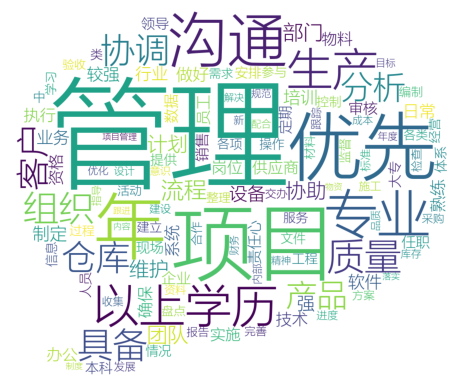

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

frequencies = result.groupby('word')['word'].count()
frequencies = frequencies.sort_values(ascending = False)
backgroud_Image=plt.imread('D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\pl.jpg')

# 自己上传中文字体到kesci
font_path = 'D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\MSYHL.TTC'
wordcloud = WordCloud(font_path=font_path, # 设置字体，不设置就会出现乱码
                      max_words=120,
                      background_color='white',
                      mask=backgroud_Image)# 词云形状

my_wordcloud = wordcloud.fit_words(frequencies)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()